In [10]:
# Import the modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [11]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
path = "Resources/lending_data.csv"

# Review the DataFrame
lending_data = pd.read_csv(path)

lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [12]:
lending_data.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


<Axes: >

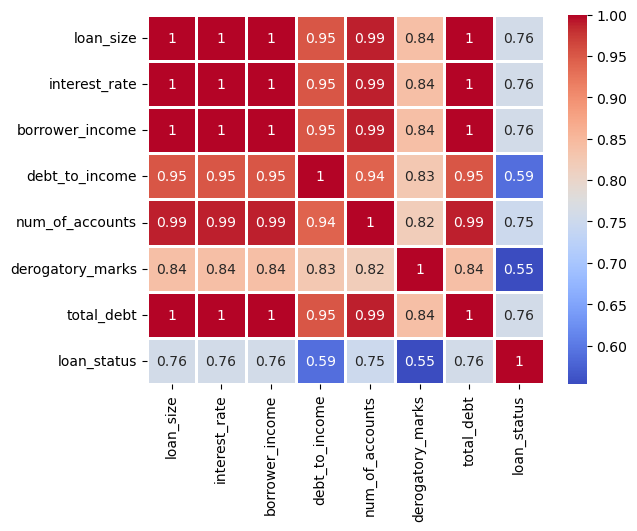

In [13]:
sns.heatmap(lending_data.corr(), cmap='coolwarm', linewidth = 1, annot=True)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


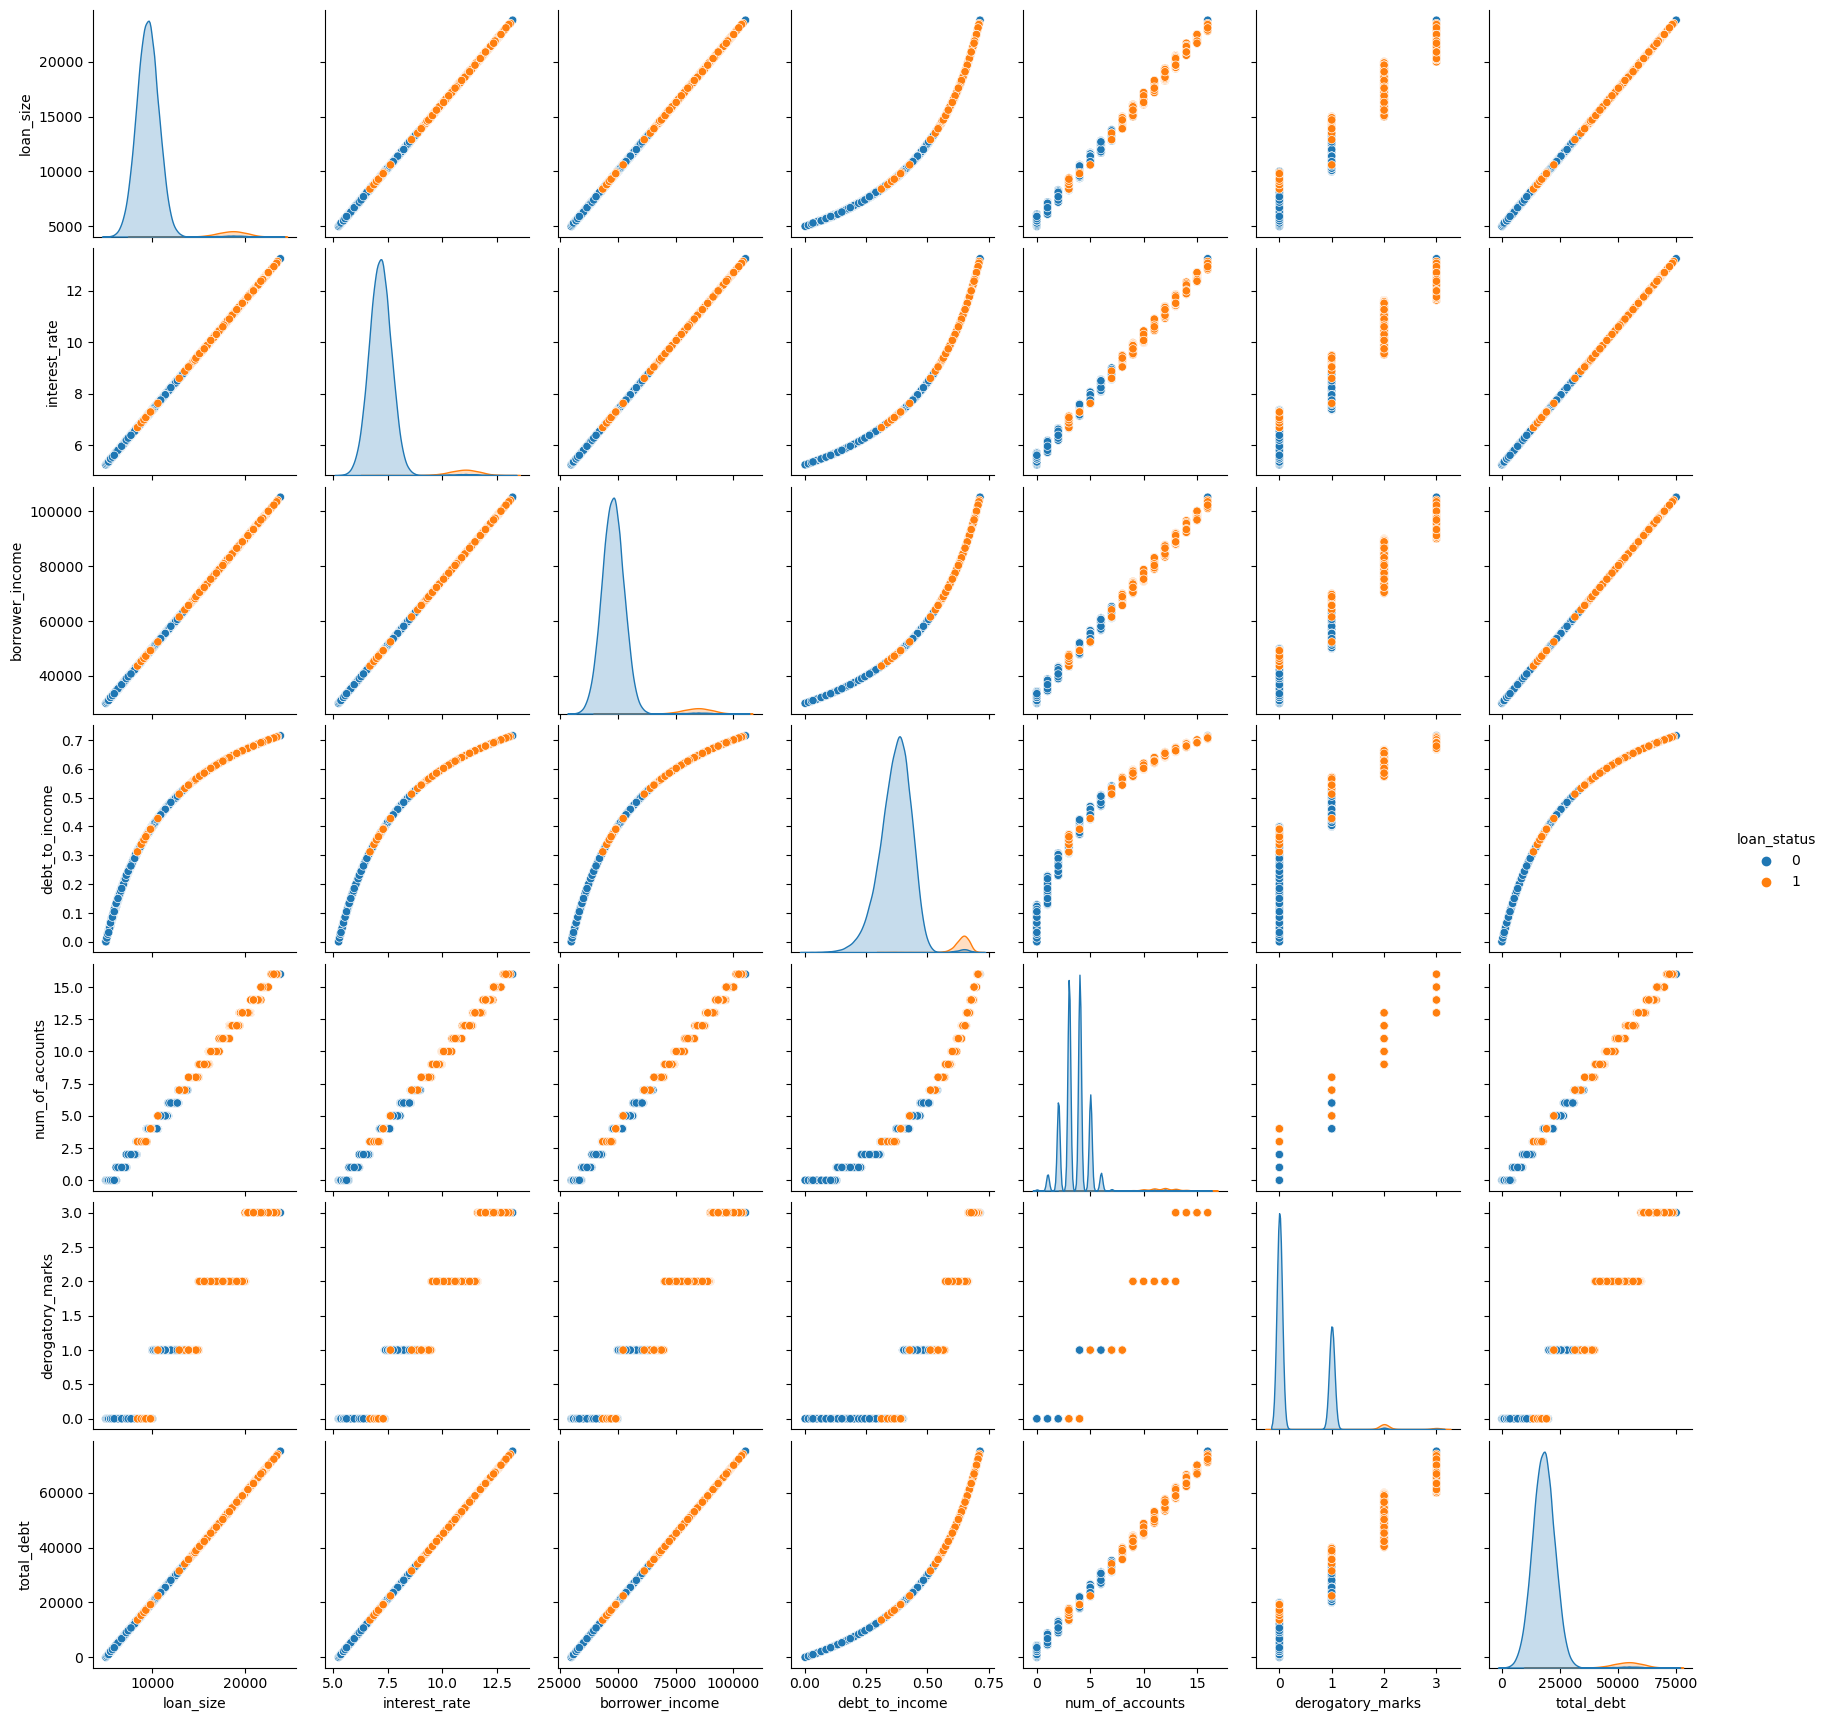

In [14]:
# Showing the linearity of the features
sns.pairplot(lending_data, hue='loan_status')


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [15]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data['loan_status'].values.reshape(-1, 1)

# Separate the X variable, the features
X = lending_data.drop('loan_status', axis=1)

In [16]:
# Review the y variable Series
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [17]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [18]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# * Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [19]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr_model = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
lr_model.fit(X_train, y_train)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [20]:
# Make a prediction using the testing data
lr_reg_predictions = lr_model.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

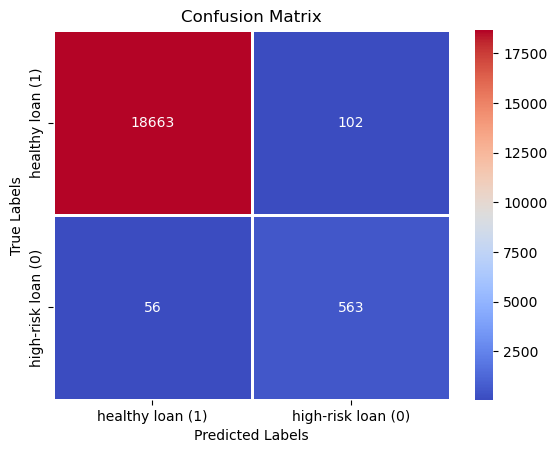

In [21]:
# Generate a confusion matrix for the model
cf_metrix = confusion_matrix(y_test, lr_reg_predictions)

# * Generating a confusion matrix heatmap
sns.heatmap(cf_metrix, cmap='coolwarm', fmt='d', annot=True, linewidth=1)

# Altering the heat map specifications
# * Changing the x, y labels and adding a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# * Changing the x, y ticks by adding a label
plt.xticks(ticks=[0.5, 1.5], labels =['healthy loan (1)', 'high-risk loan (0)'])
plt.yticks(ticks=[0.5, 1.5], labels =['healthy loan (1)', 'high-risk loan (0)'])

# * Rendering the confusion matrix heatmap
plt.show()

True Positive: 18663
<br>
False Negative: 102
<br>
False Positive: 56
<br>
True Negative: 563

In [22]:
# Print the classification report for the model
print(classification_report(y_test, lr_reg_predictions, target_names=['healthy loan (0)', 'high-risk loan (1)']))

                    precision    recall  f1-score   support

  healthy loan (0)       1.00      0.99      1.00     18765
high-risk loan (1)       0.85      0.91      0.88       619

          accuracy                           0.99     19384
         macro avg       0.92      0.95      0.94     19384
      weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

#### Question: How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

##### Answer => 
**Label 0  - Healthy Loan**
1. Precision - The precision 1.0 indicating that when the model predicts a healthy loan it is correct 100% of the times. 
2. Recall - The recall score is 0.99 suggesting that the model correctly identifies 99% of the actual loans correctly as healthy loans.
3. f1-score - The f1-score is 1, indicating a perfect performance of the model.

**Label 1 - High-Risk Loan**
1. Precision - The precision is 0.85 indicating that when the model predicts a high-risk loan it is correct 85% of the times.
2. Recall - The recall score is 0.91 indicating that the model correctly identifies 91% of the actual loans as high-risk loans.
3. f1-score - The f1-score is 0.88, indicating a good performance overall of 88% accuracy. 

In summary, the logistic regression model performs exceptionally well in predicting both healthy and high-risk loans. It demonstrates high precision, recall, and accuracy, making it a reliable model for this classification task.

---